# Dependencies

In [3]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# To create a deep copy of a mutable object
from copy import deepcopy

# Models
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM #Note: SVM are better with small sample size

# Metrics and Utilities
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score

# Exceptions
from sklearn.exceptions import NotFittedError

# Configurations
#pd.set_option('display.float_format', lambda x: '%.2f' % x) 
pd.set_option('display.colheader_justify', 'center')


pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None) 
sns.set_theme()

# Data Exploration

In [4]:
# Read DataFrame and create a Deep Copy
df_main = pd.read_csv('creditcard_sliced.csv')
df = deepcopy(df_main)

In [5]:
print(
    "*** DATA TYPES ***\n\n"
    , df.dtypes # Show data types of dataframe
    , "\n\n*** STATISTICS ***\n\n"
    , df.describe() # Show statitics per column of the dataframe
)

*** DATA TYPES ***

 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object 

*** STATISTICS ***

          Time       V1        V2        V3        V4        V5        V6     \
count 142403.00 142403.00 142403.00 142403.00 142403.00 142403.00 142403.00   
mean   52402.92     -0.25      0.02      0.67      0.14     -0.28      0.08   
std    21104.55      1.81      1.61      1.27      1.32      1.31      1.28   
min        0.00    -56.41    -72.72    -33.68     -5.52    -42.15   

In [4]:
# Calculates the Nulls Percentage per Column
print ("\n*** PERCENTAGE OF NULLS PER COLUMN ***\n" )
for col_name in df:
    null_values = df[col_name].isnull()
    null_values_mean = np.mean(null_values)
    # Rounding the number and getting a percetange  
    null_values_percentage = round(null_values_mean*100,2)           
    print (f"{col_name} - {null_values_percentage}%")

# Nulls Integer
print (f"\n*** INTEGER OF NULLS PER COLUMN ***\n" )
# Sum of all the nulls
print (df.isnull().sum())

# Types of Null (Blank, NaN, n/a) per Column
data = {}

for col_name in df:
    null_values = df[col_name].isnull()
    col_nulls = df.loc[null_values,col_name]
    col_nulls_unique = col_nulls.unique()
    data[col_name] = pd.Series(col_nulls_unique)

# Create a new dataframe using unique types of null
df2 = pd.DataFrame(data)
print ("\n*** TYPES OF NULLS PER COLUMN ***\n")
print (df2)

# First 10 Rows with Null Values
print ("\n*** FIRST 10 ROWS CONTAINING NULL VALUES ***\n")
df[df.isnull().any(axis=1)][0:10]


*** PERCENTAGE OF NULLS PER COLUMN ***

Time - 0.0%
V1 - 0.0%
V2 - 0.0%
V3 - 0.0%
V4 - 0.0%
V5 - 0.0%
V6 - 0.0%
V7 - 0.0%
V8 - 0.0%
V9 - 0.0%
V10 - 0.0%
V11 - 0.0%
V12 - 0.0%
V13 - 0.0%
V14 - 0.0%
V15 - 0.0%
V16 - 0.0%
V17 - 0.0%
V18 - 0.0%
V19 - 0.0%
V20 - 0.0%
V21 - 0.0%
V22 - 0.0%
V23 - 0.0%
V24 - 0.0%
V25 - 0.0%
V26 - 0.0%
V27 - 0.0%
V28 - 0.0%
Amount - 0.0%
Class - 0.0%

*** INTEGER OF NULLS PER COLUMN ***

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*** TYPES OF NULLS PER COLUMN ***

Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28,

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


<Axes: >

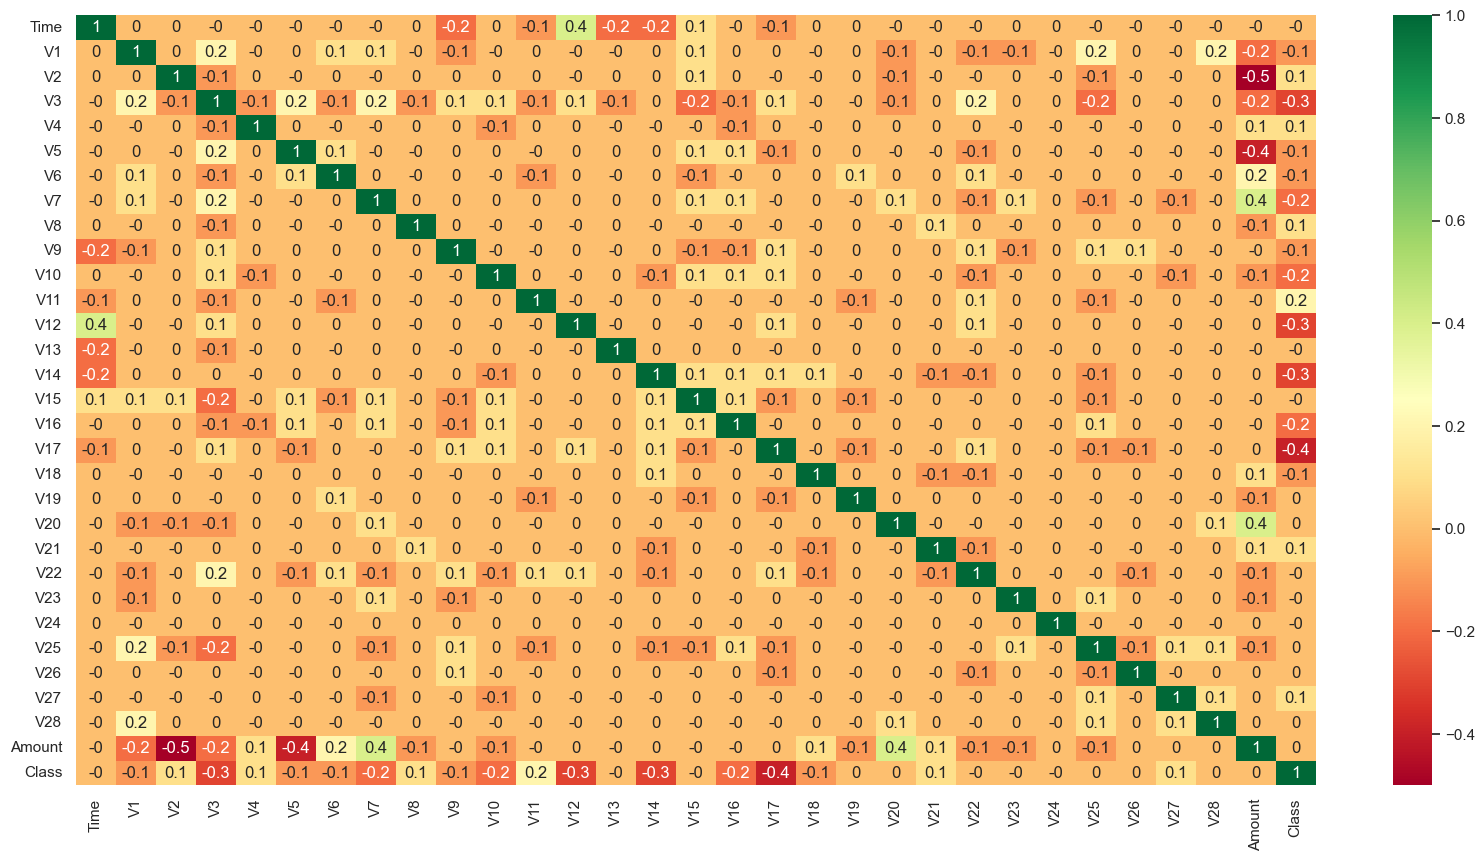

In [5]:
# Correlation Heatmap
plt.figure(figsize=(20,10))

correlation_matrix = df.corr()

sns.heatmap(
    round(correlation_matrix, 1)
    , annot=True
    , cmap="RdYlGn"
)

# Data Preprocessing

In [6]:
# 1 = Fraud, 0 = Not Fraud
df_fraud_0 = df[df['Class'] == 0]
df_fraud_1 = df[df['Class'] == 1]

print(f"""
    Number of Non-Fraud Transactions: {df_fraud_0.shape[0]}
    Number of Fraud Transactions: {df_fraud_1.shape[0]}
    """
)


    Number of Non-Fraud Transactions: 142134
    Number of Fraud Transactions: 269
    


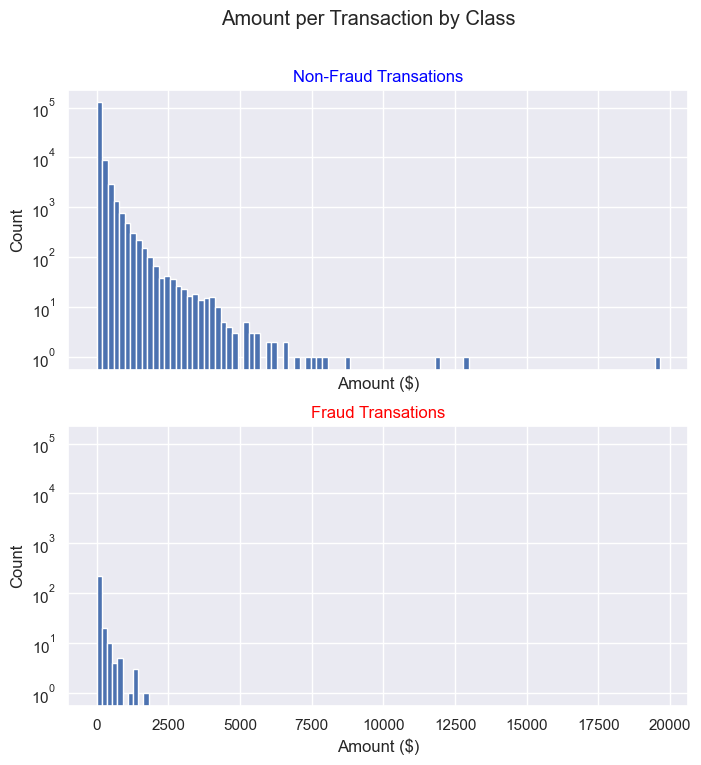

In [7]:
# Histograms: Count(Number of Transactions) and Amount($)
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(8, 8))
fig.suptitle('Amount per Transaction by Class')

ax[0].set_title("Non-Fraud Transations", color="blue")
ax[0].hist(x=df_fraud_0['Amount'], bins=100)
ax[0].set_xlabel('Amount ($)')
ax[0].set_ylabel('Count')

ax[1].set_title("Fraud Transations", color="red")
ax[1].hist(x=df_fraud_1['Amount'], bins=10)
ax[1].set_xlabel('Amount ($)')
ax[1].set_ylabel('Count')

plt.yscale('log')

In [8]:
# Sample the data: 3%
df_fraud_0sample = df_fraud_0.sample(frac= 0.03, random_state=42)
df_fraud_0sample.shape

(4264, 31)

In [9]:
# Merging the two classes and Shuffle the resulting DataFrame 
df_fraud_0sample_1 = pd.concat([df_fraud_0sample, df_fraud_1]).reset_index(drop=True)
df_fraud_0sample_1 = shuffle(df_fraud_0sample_1)

In [10]:
# Renaming the "Class" Column to "Fraud"
df_fraud_0sample_1.rename(columns={'Class':'Fraud'}, inplace=True)

In [11]:
# Deviding the DataFrame into Features(x) and Target(y) variables
X = df_fraud_0sample_1.drop('Fraud', axis=1)
y = df_fraud_0sample_1['Fraud']

In [12]:
# Dividing the variables into Train set and Test set, 80:20 ratio Train:Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(f"""
    X Train Shape: {X_train.shape}
    X Test Shape: {X_test.shape}
    Y Train Shape: {y_train.shape}
    Y Test Shape: {y_test.shape}
"""    
)


    X Train Shape: (3626, 30)
    X Test Shape: (907, 30)
    Y Train Shape: (3626,)
    Y Test Shape: (907,)



# Modelling

In [13]:
# Function to train and fit a model
def fit_model(pipe, X_train, y_train):
    pipe.fit(X_train, y_train)
    return pipe

# Pipelines to Train Multiple Models
pipelines = {
    'Isolation_Forest': make_pipeline(IsolationForest()),
    'Local_Outlier_Factor': make_pipeline(LocalOutlierFactor(novelty=True)),
    'One_Class_SVM': make_pipeline(OneClassSVM())
}

# Training Each Model from the Pipelines
fit_models = {}

for algo, pipe in pipelines.items():
    print(f"{algo} is training")
    fit_models[algo] = fit_model(pipe, X_train, y_train)
    print(f"{algo} finished training\n")

Isolation_Forest is training
Isolation_Forest finished training

Local_Outlier_Factor is training
Local_Outlier_Factor finished training

One_Class_SVM is training
One_Class_SVM finished training



# Evaluation

In [14]:
# Function to predict and evaluate model
def evaluate_model(algo, X_test, y_test):
    prediction = algo.predict(X_test)
    # Transform -1 to 1 (outlier), and 1 to 0 (inlier)
    y_hat = np.where(prediction == -1, 1, 0)
    return confusion_matrix(y_test, y_hat), accuracy_score(y_test, y_hat)

# Generating Confusion Matrices and Accuracy Scores for Each Model
for model, algo in fit_models.items():
    conf_matrix, acc_score = evaluate_model(algo, X_test, y_test)
    classification_rate = math.floor(acc_score*100)

    fit_models[model] = {
        "algorithm" : algo
        , "confusion_matrix" : conf_matrix
        , "accuracy_score" : acc_score
        , "classification_rate" : classification_rate
        , "misclassification_rate" : abs(classification_rate - 100)
    }

c:\Users\aldan\Desktop\Data_Scientist\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [15]:
# Confusion Matrices
for model, stats in fit_models.items():
    
    print(f"\n-------- Confusion Matrix for {model.upper()} --------\n")
    conf_matrix_df = pd.DataFrame(
        data=stats["confusion_matrix"]
        , columns=['Predicted Non-Fraud', 'Predicted Fraud']
        , index=['Actual Non-Fraud', 'Actual Fraud']
    )

    print(conf_matrix_df)


-------- Confusion Matrix for ISOLATION_FOREST --------

                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud          833                17       
Actual Fraud               18                39       

-------- Confusion Matrix for LOCAL_OUTLIER_FACTOR --------

                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud          811                39       
Actual Fraud               50                 7       

-------- Confusion Matrix for ONE_CLASS_SVM --------

                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud          400                450      
Actual Fraud               29                 28      


In [17]:
# Classification Rate and Misclassification Rate
data_df = {}

for model, stats in fit_models.items():
    data_df[model] = {
        "classification_rate" : stats["classification_rate"]
        , "misclassification_rate" : stats["misclassification_rate"]
    }

df_accuracy = pd.DataFrame.from_dict(data_df, orient='index')

# Sort values by "Classification Rate" in descending order
print(df_accuracy.sort_values(by='classification_rate', ascending=False) )

                      classification_rate  misclassification_rate
Isolation_Forest              96                      4          
Local_Outlier_Factor          90                     10          
One_Class_SVM                 47                     53          
